<a href="https://colab.research.google.com/github/kriteshshrestha/ai_lab_vaccume_knn-kriteshshrestha-/blob/main/simple_reflex_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

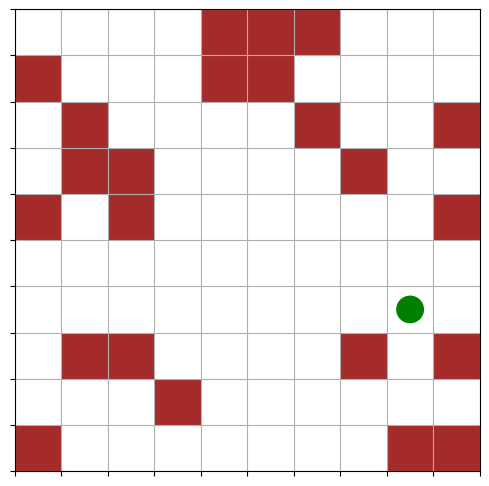

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
from IPython.display import clear_output
import random

# Grid size
ROWS, COLS = 10, 10

# Initialize dirt
np.random.seed(42)
dirt_grid = (np.random.rand(ROWS, COLS) < 0.2).astype(int)

# Starting position of agent
agent_pos = [5, 5]

# Helper functions
def is_valid(r, c):
    return 0 <= r < ROWS and 0 <= c < COLS

def draw_grid():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, COLS)
    ax.set_ylim(0, ROWS)
    ax.set_xticks(np.arange(0, COLS + 1, 1))
    ax.set_yticks(np.arange(0, ROWS + 1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Draw dirt
    for r in range(ROWS):
        for c in range(COLS):
            if dirt_grid[r, c] == 1:
                rect = patches.Rectangle((c, ROWS - r - 1), 1, 1, facecolor='brown')
                ax.add_patch(rect)

    # Draw agent
    r, c = agent_pos
    circ = patches.Circle((c + 0.5, ROWS - r - 0.5), 0.3, facecolor='green')
    ax.add_patch(circ)

    plt.show()

# Simulation loop
steps = 0
max_steps = 150

while steps < max_steps and np.any(dirt_grid == 1):
    clear_output(wait=True)
    draw_grid()
    time.sleep(0.3)

    r, c = agent_pos
    moved = False

    # Reflex Rule: If dirt in adjacent cell, move there
    for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
        nr, nc = r + dr, c + dc
        if is_valid(nr, nc) and dirt_grid[nr, nc] == 1:
            agent_pos = [nr, nc]
            dirt_grid[nr, nc] = 0
            moved = True
            break

    # If no dirt nearby, move randomly
    if not moved:
        directions = [(-1,0), (1,0), (0,-1), (0,1)]
        random.shuffle(directions)
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if is_valid(nr, nc):
                agent_pos = [nr, nc]
                break

    # Clean current cell if dirty (optional reflex)
    if dirt_grid[agent_pos[0], agent_pos[1]] == 1:
        dirt_grid[agent_pos[0], agent_pos[1]] = 0

    steps += 1

clear_output(wait=True)
draw_grid()
print("Simple Reflex Agent finished in", steps, "steps.")
